<a href="https://colab.research.google.com/github/arielle00/CMPE257-Fall23-Arielle-Shnayder/blob/class-activity/synthetic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
df = pd.read_csv('synthetic_dataset.csv')
# df.head()
df.insert(0,"x0",[1 for i in range(50)])
df.head

<bound method NDFrame.head of     x0        x1        x2  y
0    1 -4.641770  5.558556  1
1    1  7.139793  6.571105  1
2    1  4.127969 -9.024912 -1
3    1  0.081377  3.861381  1
4    1 -1.253937  8.009625  1
5    1  0.691457 -7.475995 -1
6    1  0.652163 -3.871063 -1
7    1  5.136417  1.113326  1
8    1  1.107815  4.554135  1
9    1  1.543556 -2.519626  1
10   1 -4.779720 -0.630814 -1
11   1  3.858113 -7.419825 -1
12   1 -8.583122  4.002171 -1
13   1  9.569902  2.528168  1
14   1 -2.209894 -9.980375 -1
15   1  4.899275  7.742115  1
16   1 -0.203597 -5.380567 -1
17   1  5.575367  3.495771  1
18   1 -3.662493  1.406601 -1
19   1 -9.251072 -8.367551 -1
20   1  6.907998 -1.895983  1
21   1 -2.368033  2.337284  1
22   1  3.287761  5.682772  1
23   1  8.573629  4.714370  1
24   1 -6.391904 -3.394939 -1
25   1 -9.484470 -2.671820 -1
26   1 -0.447425 -3.710735 -1
27   1  5.781484 -6.310988  1
28   1 -6.008654 -4.243973 -1
29   1  7.627841  9.697011  1
30   1 -4.004916  7.633855  1
31   1 -0.

<Axes: xlabel='x1', ylabel='x2'>

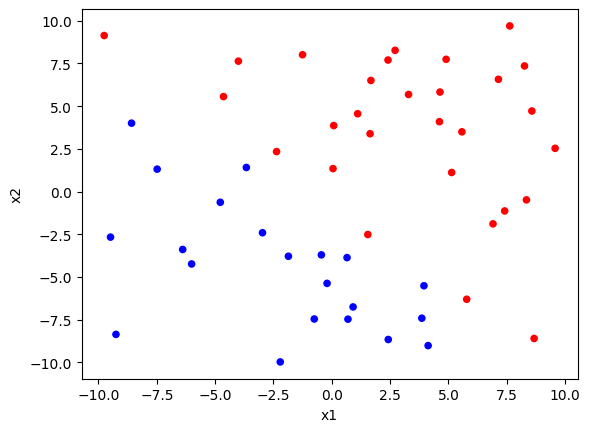

In [3]:
df["color"] = np.where(df["y"]==1, "red", "blue")
df.plot.scatter(x="x1", y="x2", color=df["color"])

In [61]:
def sign(x):
  if(x>=0):
    return 1
  else:
    return -1

In [102]:
def get_sign(x, w):
  dot_product = (x[0]*w[0] + x[1]*w[1] + x[2]*w[2])
  return sign(dot_product)

In [103]:
df_y = df["y"]
# classified_h = []

# global misclassified
#misclassified = {}

def check_for_misclassified(w):
  # print("new weight: " , w);
  misclassified = {}
  # print("before:",misclassified)
  classified_on_current_w_line = []
  for i in range (df.shape[0]):
    classified_on_current_w_line.append(get_sign(df.iloc[i],w))

    if(classified_on_current_w_line[i]!=df_y[i]):
        misclassified[i] = classified_on_current_w_line[i]

  # print(classified_on_current_w_line)
  # print("after:",misclassified)
  return misclassified

In [110]:
def plot_it(i, w):
  print ("For iteration", i, " and weight", w, " our classification result is: ")
  col = df['y'].map({-1:'b', 1:'r'})
  df.plot.scatter(x='x1', y='x2', c=col)
  axes = plt.gca()
  axes.set_ylim(-10,10)

  x_vals = np.array(axes.get_xlim())
  print(x_vals)
  y_vals = -w[0]/w[2] - w[1]/w[2] * x_vals
  plt.plot(x_vals, y_vals, '--')

def perceptron():
  w = [0,1,1]
  misclassified = check_for_misclassified(w)
  # print(len(misclassified))
  i=0
  plot_it(i, w)
  while(len(misclassified)!=0):

  #while(i in range(100)):

    list_of_misclass = list(misclassified.keys())[0]
    x0 = df.iloc[list_of_misclass][0]
    x1 = df.iloc[list_of_misclass][1]
    x2 = df.iloc[list_of_misclass][2]
    y = df.iloc[list_of_misclass][3]
    # print ("y is plus :: " , y)
    # print("misclass",list_of_misclass)
    # y = df_y[]
    # print("misclassified point:",x1,x2)
    # print("",df.iloc[list_of_misclass])
    w[0] = w[0] + x0*y
    w[1] = w[1] + x1*y
    w[2] = w[2] + x2*y

    # print("new w:",w)
    misclassified = check_for_misclassified(w)
    plot_it(i, w)
    i=i+1

  return w

For iteration 0  and weight [0, 1, 1]  our classification result is: 
[-10.72189229  10.53617763]
For iteration 0  and weight [1, 2.543556165, -1.519625815]  our classification result is: 
[-10.72189229  10.53617763]
For iteration 1  and weight [2, -2.098214091, 4.038929906]  our classification result is: 
[-10.72189229  10.53617763]
For iteration 2  and weight [3, 3.0382026040000003, 5.152256318]  our classification result is: 
[-10.72189229  10.53617763]
For iteration 3  and weight [4, 4.581758769, 2.632630503]  our classification result is: 
[-10.72189229  10.53617763]
For iteration 4  and weight [5, -0.0600114869999997, 8.191186224]  our classification result is: 
[-10.72189229  10.53617763]
For iteration 5  and weight [6, 1.4835446780000003, 5.671560409000001]  our classification result is: 
[-10.72189229  10.53617763]
For iteration 6  and weight [7, 3.0271008430000004, 3.1519345940000014]  our classification result is: 
[-10.72189229  10.53617763]
For iteration 7  and weight [6, 

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


[-10.72189229  10.53617763]
For iteration 21  and weight [12, -0.600629354999997, 15.637832257000005]  our classification result is: 
[-10.72189229  10.53617763]
For iteration 22  and weight [13, 0.942926810000003, 13.118206442000005]  our classification result is: 
[-10.72189229  10.53617763]
For iteration 23  and weight [14, 2.486482975000003, 10.598580627000006]  our classification result is: 
[-10.72189229  10.53617763]
For iteration 24  and weight [15, 4.030039140000003, 8.078954812000006]  our classification result is: 
[-10.72189229  10.53617763]
For iteration 25  and weight [14, 12.613160914000003, 4.0767833380000065]  our classification result is: 
[-10.72189229  10.53617763]
For iteration 26  and weight [15, 7.971390658000003, 9.635339059000007]  our classification result is: 
[-10.72189229  10.53617763]


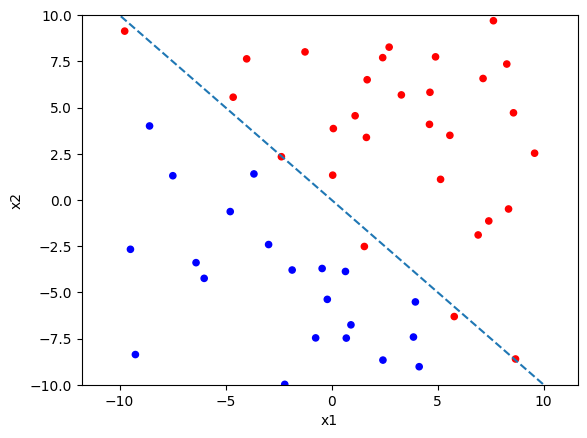

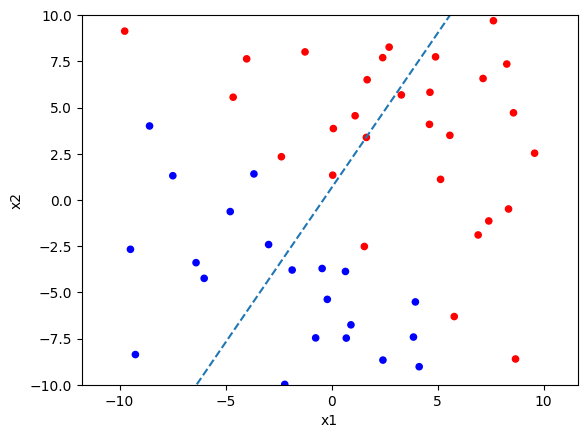

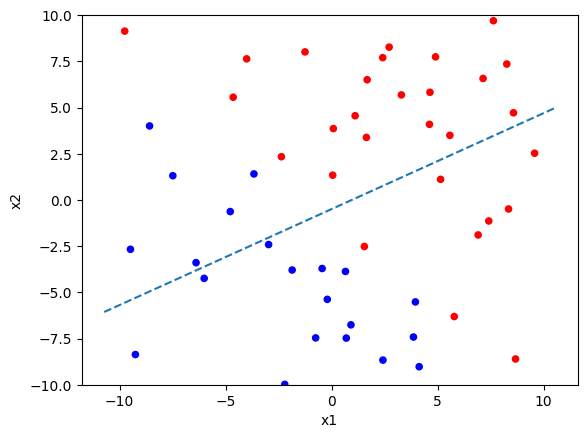

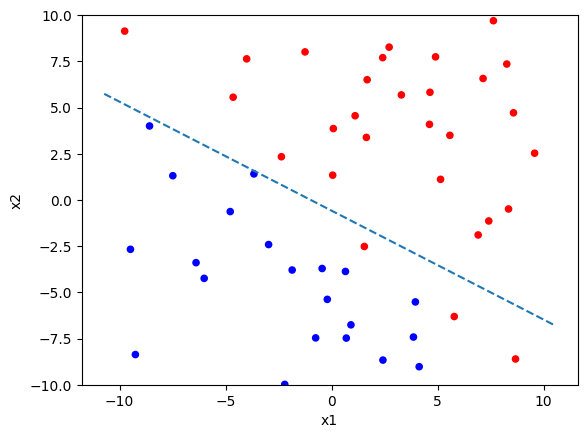

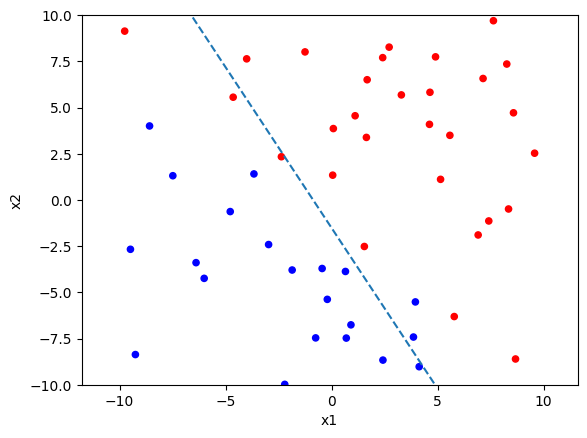

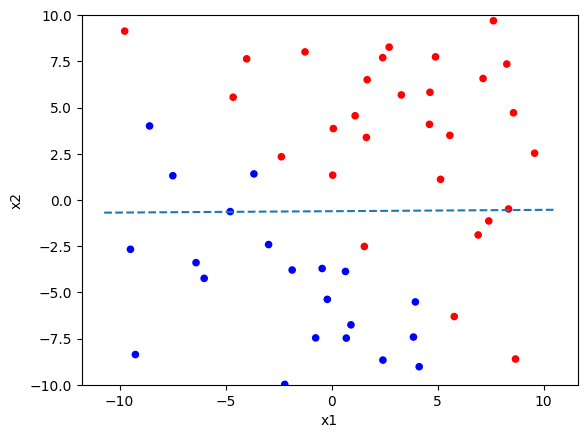

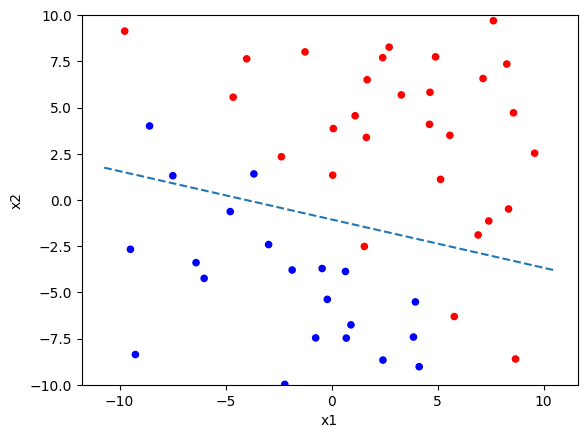

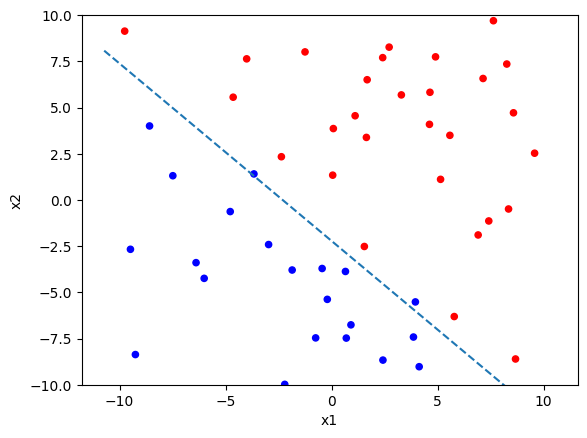

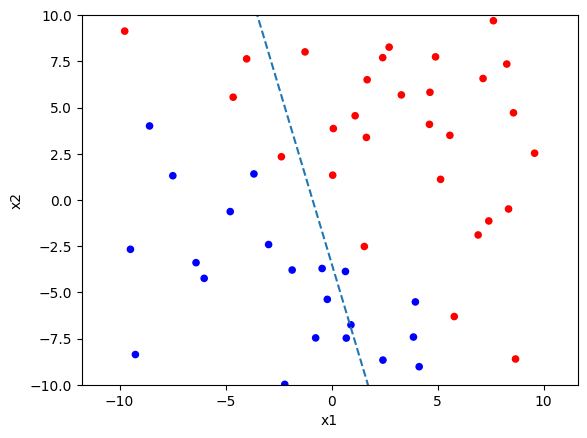

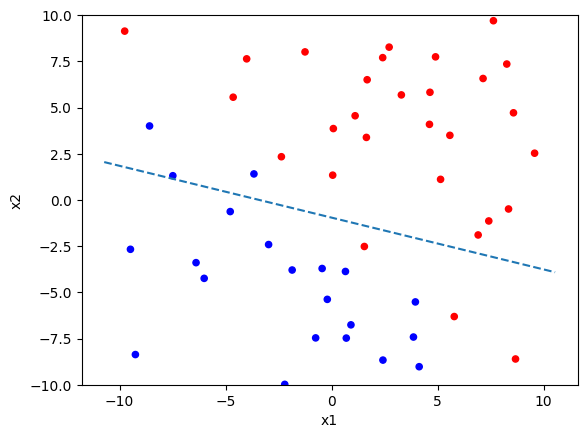

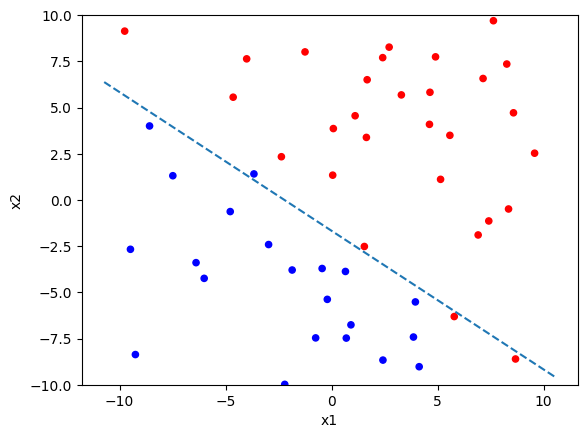

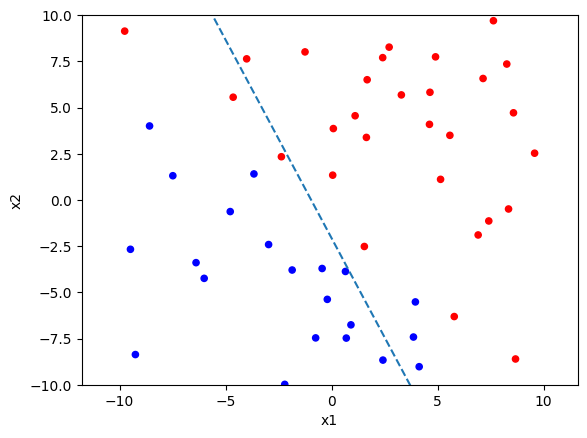

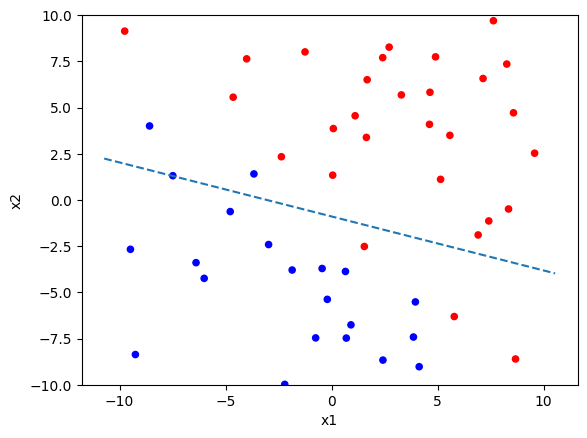

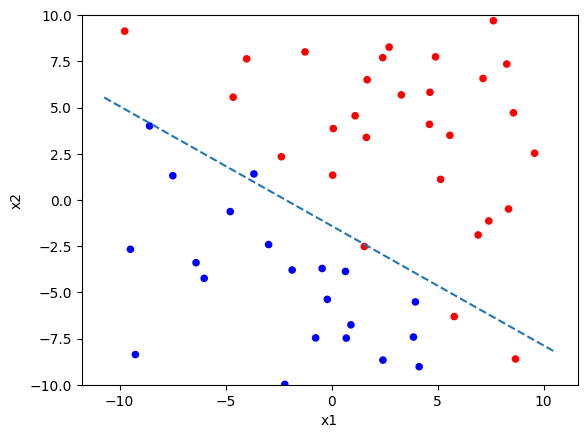

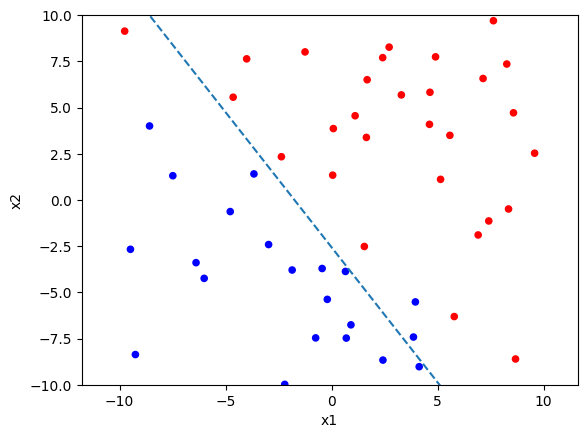

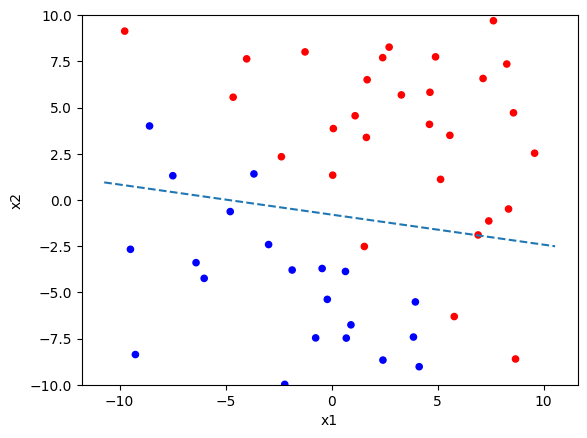

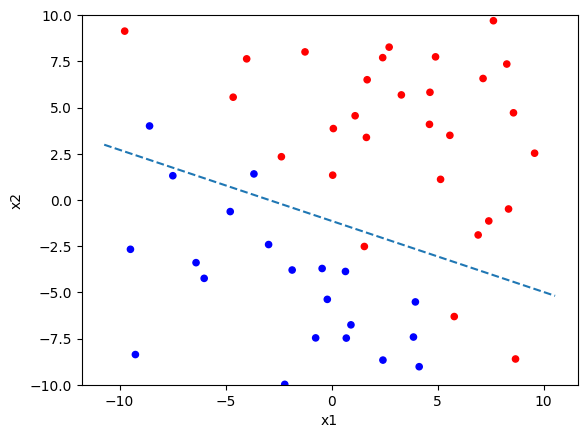

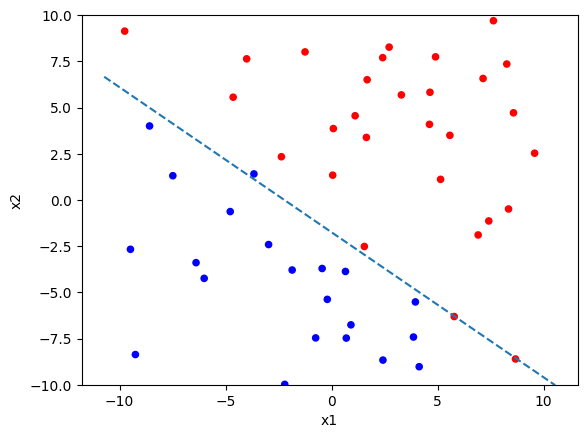

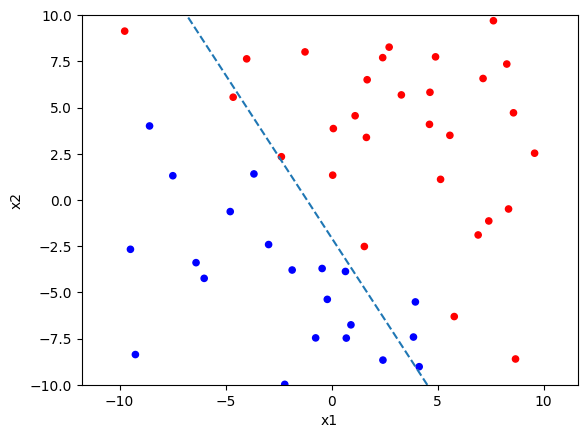

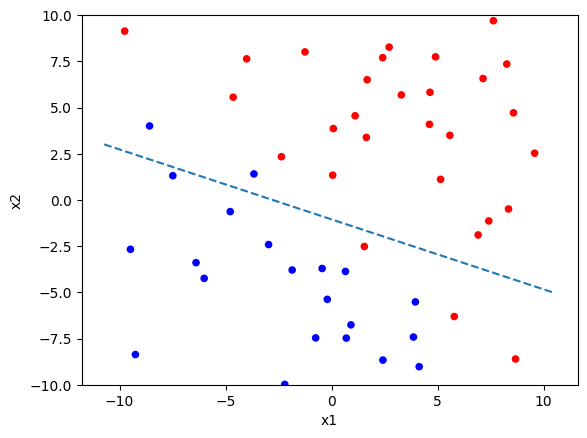

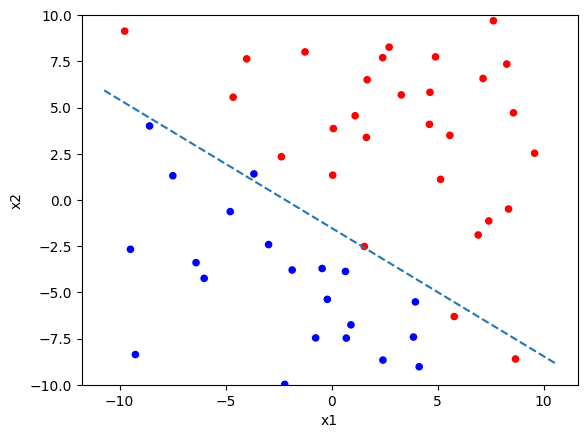

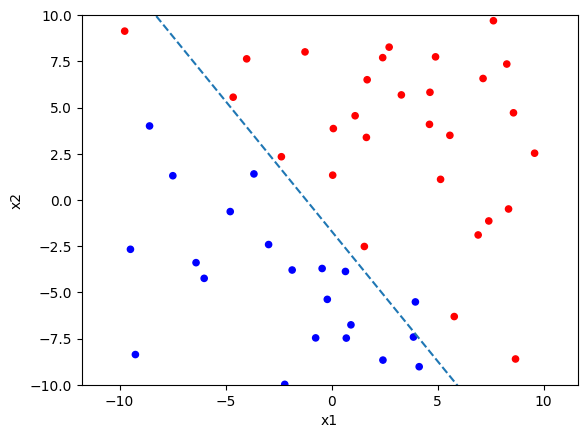

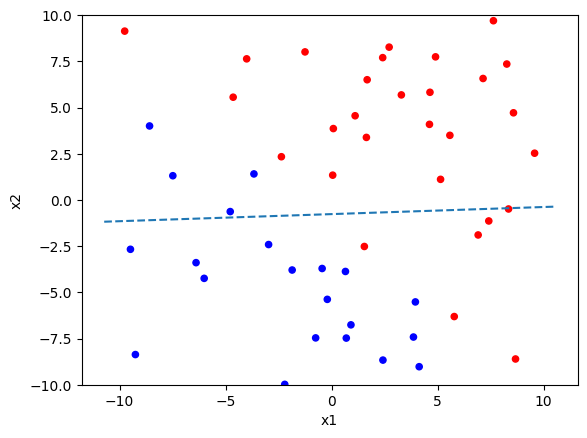

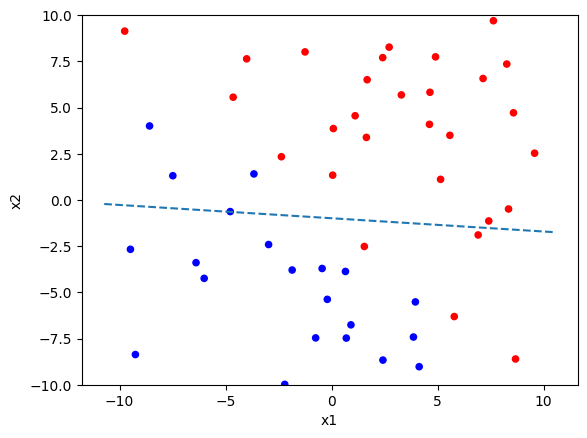

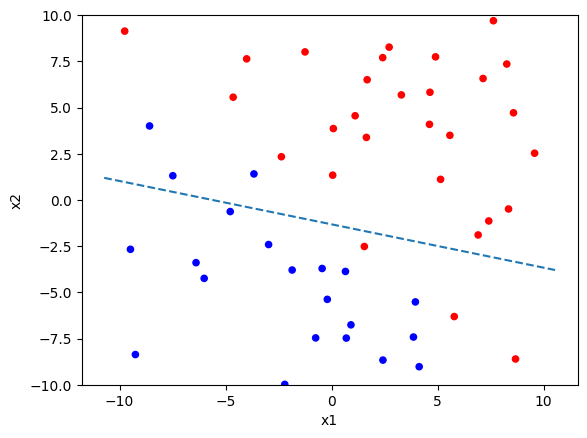

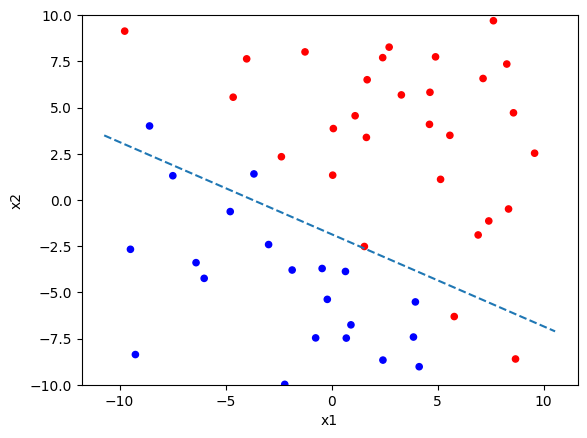

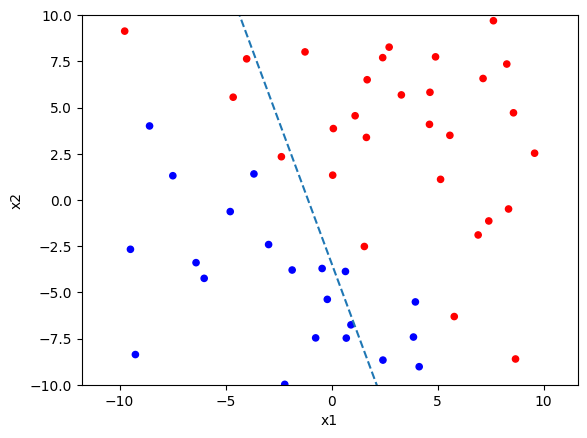

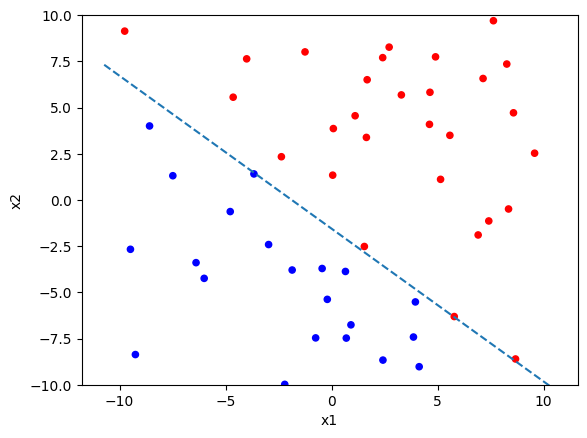

In [111]:
w = perceptron()

[-10.72189229  10.53617763]


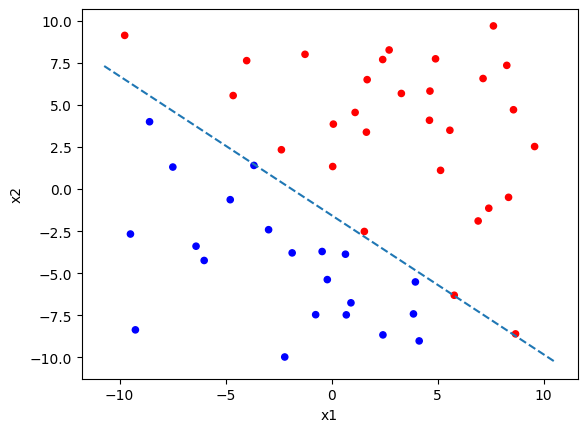

In [98]:
def plot_it(w):
  col = df['y'].map({-1:'b', 1:'r'})
  df.plot.scatter(x='x1', y='x2', c=col)
  axes = plt.gca()

  x_vals = np.array(axes.get_xlim())
  print(x_vals)
  y_vals = -w[0]/w[2] - w[1]/w[2] * x_vals
  plt.plot(x_vals, y_vals, '--')